In [1]:
import pandas as pd
# 指定文件路径
file_path = 'horse-colic.data'
# 读取数据文件
# 假设数据文件是以空格或制表符分隔的
df = pd.read_csv(file_path, delim_whitespace=True, header=None, na_values='?')
# 显示数据框架的前几行以检查
print(df.head())



    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


C:\Users\86157\AppData\Local\Temp\ipykernel_18504\1543652696.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, na_values='?')


导入数据

In [2]:
from sklearn.impute import SimpleImputer
# 定义列名
column_names = [
    "surgery", "age", "hospital_number", "rectal_temperature", "pulse", "respiratory_rate",
    "temperature_of_extremities", "peripheral_pulse", "mucous_membranes", "capillary_refill_time",
    "pain", "peristalsis", "abdominal_distension", "nasogastric_tube", "nasogastric_reflux",
    "nasogastric_reflux_ph", "rectal_examination_feces", "abdomen", "packed_cell_volume",
    "total_protein", "abdominocentesis_appearance", "abdominocentesis_total_protein", "outcome",
    "surgical_lesion", "lesion_site_type_subtype_1", "lesion_site_type_subtype_2", "lesion_site_type_subtype_3",
    "cp_data"
]

# 为数据框设置列名
df.columns = column_names
# 删除第三个属性，列索引从0开始，所以第三个属性的索引是2
df = df.drop(column_names[2], axis=1)
# 查看删除后的DataFrame
print(df.head())

   surgery  age  rectal_temperature  pulse  respiratory_rate  \
0      2.0    1                38.5   66.0              28.0   
1      1.0    1                39.2   88.0              20.0   
2      2.0    1                38.3   40.0              24.0   
3      1.0    9                39.1  164.0              84.0   
4      2.0    1                37.3  104.0              35.0   

   temperature_of_extremities  peripheral_pulse  mucous_membranes  \
0                         3.0               3.0               NaN   
1                         NaN               NaN               4.0   
2                         1.0               1.0               3.0   
3                         4.0               1.0               6.0   
4                         NaN               NaN               6.0   

   capillary_refill_time  pain  ...  packed_cell_volume  total_protein  \
0                    2.0   5.0  ...                45.0            8.4   
1                    1.0   3.0  ...                5

In [3]:

import pandas as pd
from sklearn.impute import SimpleImputer
# 使用众数填充策略的列索引
columns_mode_mean_idx = [ 2, 3, 4, 14, 17, 18, 20 ] 
columns_mode_most_idx = [ 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21]  

# 创建用于众数填充的imputer
imputer_mode = SimpleImputer(strategy='most_frequent')
# 创建用于平均值填充的imputer
imputer_mean = SimpleImputer(strategy='mean')
# 对指定列使用众数填充
df.iloc[:, columns_mode_most_idx] = imputer_mode.fit_transform(df.iloc[:, columns_mode_most_idx])
# 对指定列使用平均值填充
df.iloc[:, columns_mode_mean_idx] = imputer_mode.fit_transform(df.iloc[:, columns_mode_mean_idx])
# 查看填充后的数据
print(df.head())



   surgery  age  rectal_temperature  pulse  respiratory_rate  \
0      2.0    1                38.5   66.0              28.0   
1      1.0    1                39.2   88.0              20.0   
2      2.0    1                38.3   40.0              24.0   
3      1.0    9                39.1  164.0              84.0   
4      2.0    1                37.3  104.0              35.0   

   temperature_of_extremities  peripheral_pulse  mucous_membranes  \
0                         3.0               3.0               1.0   
1                         3.0               1.0               4.0   
2                         1.0               1.0               3.0   
3                         4.0               1.0               6.0   
4                         3.0               1.0               6.0   

   capillary_refill_time  pain  ...  packed_cell_volume  total_protein  \
0                    2.0   5.0  ...                45.0            8.4   
1                    1.0   3.0  ...                5

In [4]:
from sklearn.preprocessing import MinMaxScaler
# 假设df是你的DataFrame

# 指定你想要进行Z得分归一化的列索引
# 例如，如果你想归一化第1列、第3列和第4列（索引从0开始）
columns_to_scale_idx = [2, 3, 4, 14, 17, 18, 20]  # 替换为实际的列索引

# 初始化StandardScaler
scaler = MinMaxScaler()

# 对指定列进行Z得分归一化
df.iloc[:, columns_to_scale_idx] = scaler.fit_transform(df.iloc[:, columns_to_scale_idx])

# 查看归一化后的数据
print(df.head())

   surgery  age  rectal_temperature     pulse  respiratory_rate  \
0      2.0    1            0.574074  0.233766          0.227273   
1      1.0    1            0.703704  0.376623          0.136364   
2      2.0    1            0.537037  0.064935          0.181818   
3      1.0    9            0.685185  0.870130          0.863636   
4      2.0    1            0.351852  0.480519          0.306818   

   temperature_of_extremities  peripheral_pulse  mucous_membranes  \
0                         3.0               3.0               1.0   
1                         3.0               1.0               4.0   
2                         1.0               1.0               3.0   
3                         4.0               1.0               6.0   
4                         3.0               1.0               6.0   

   capillary_refill_time  pain  ...  packed_cell_volume  total_protein  \
0                    2.0   5.0  ...            0.423077       0.059510   
1                    1.0   3.0  ..

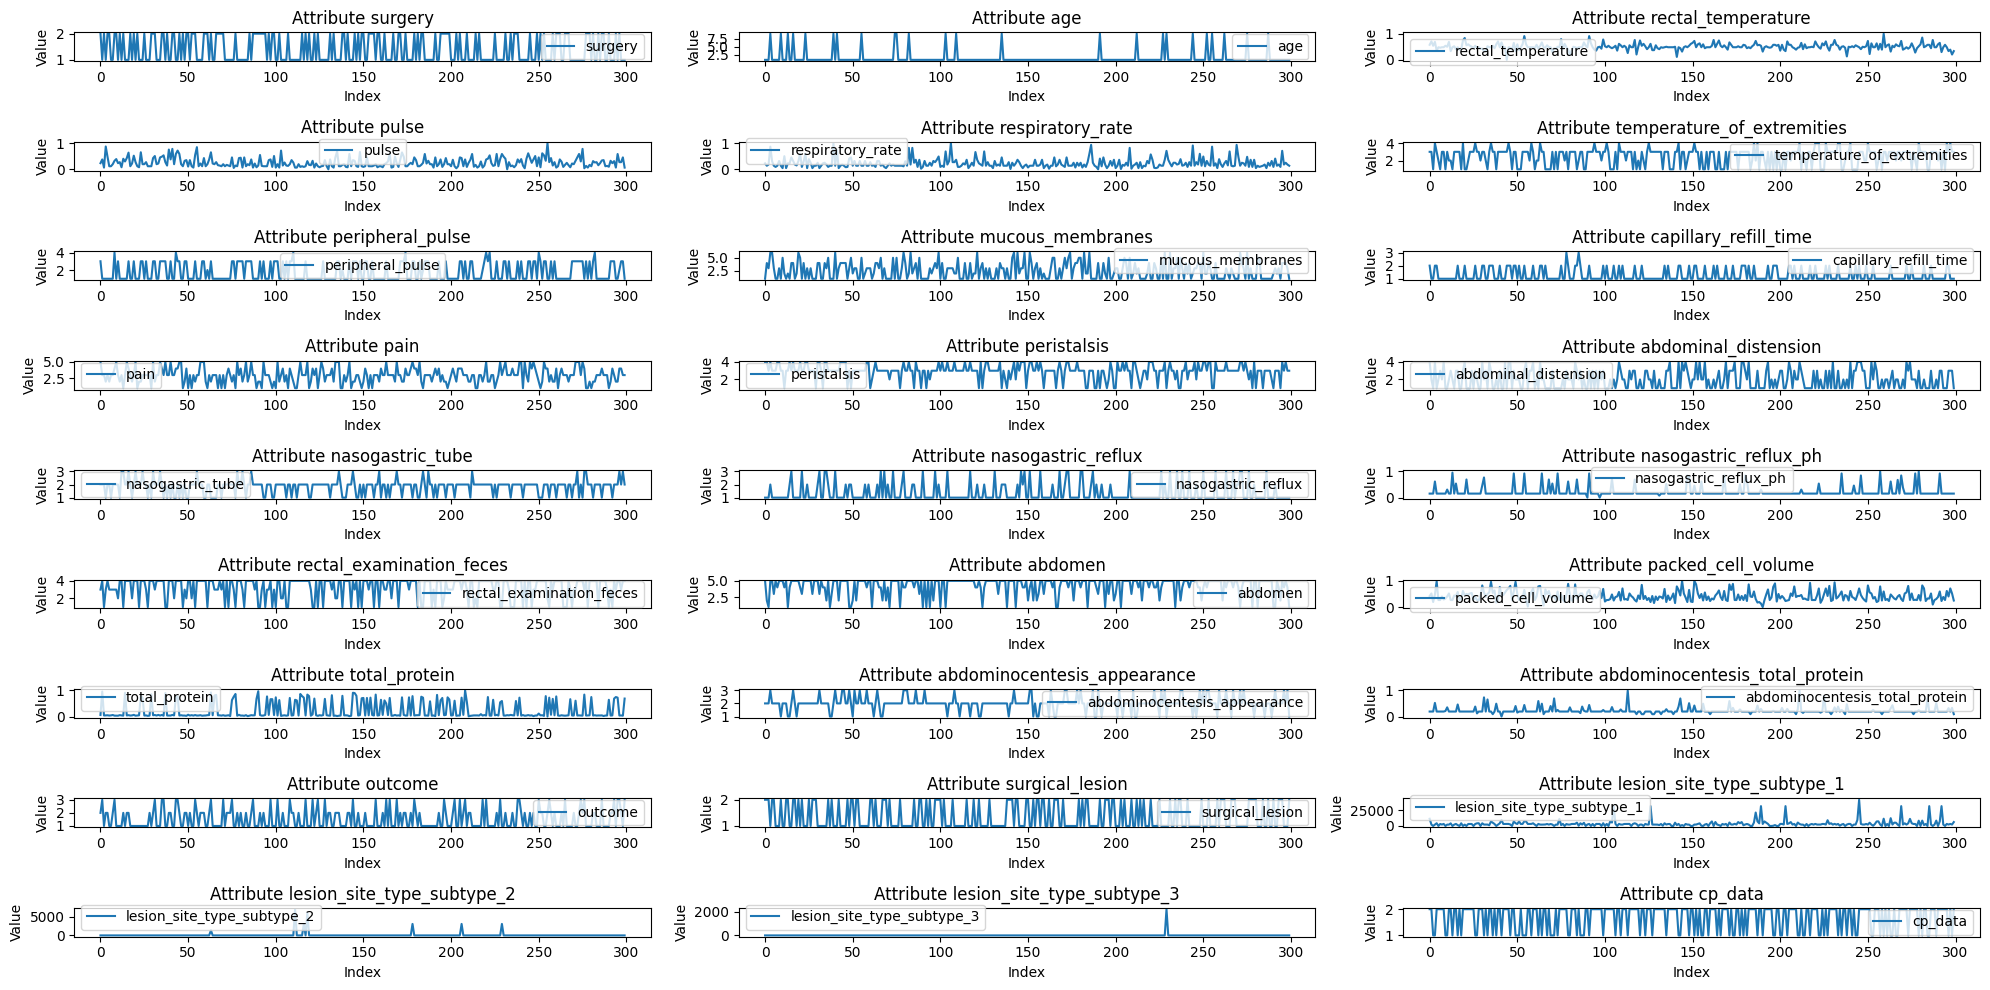

In [5]:

import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制每个属性的图形
for i, column in enumerate(df.columns):
    plt.subplot(9, 3, i+1)  # 创建9行3列的子图，总共27个子图
    plt.plot(df[column], label=column)
    plt.title(f'Attribute {column}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()